In [2]:
"""
Ryan Shuhart
MSDS 7330 - 402
November 2, 2015

resources:
http://pandas.pydata.org/pandas-docs/version/0.16.2/io.html#io-read-csv-table
http://stackoverflow.com/questions/30408450/python-long-string-on-multiple-line

Q1
https://www.youtube.com/watch?v=CNQet_kL8z4

Q2
http://learnpythonthehardway.org/book/ex39.html

Q3
http://stackoverflow.com/questions/13784192/creating-an-empty-pandas-dataframe-then-filling-it
http://pandas.pydata.org/pandas-docs/stable/visualization.html#histograms
http://stackoverflow.com/questions/19410042/how-to-make-ipython-notebook-matplotlib-plot-inline

Q4
http://stackoverflow.com/questions/30970342/remove-punctuation-from-a-list
https://docs.python.org/3/tutorial/controlflow.html
"""
import pandas as pd
from collections import defaultdict


#import text list as a pandas data frame.  Using pandas because of my familiarity with it.
scrabble = pd.read_csv(r"C:\Users\ryan.shuhart\Google Drive\SMU\Class Work\Fall 2015"\
                    "\File Organization and Database Management\Homeworks\HW4\ospd.txt",
                    header=None, names=['Word'])

In [3]:
scrabble.head()

,Word
0,aa
1,aah
2,aahed
3,aahing
4,aahs


In [128]:
#Questions #1-3

#Define function to 
def anagrams(words):
    table = defaultdict(list)
    
    for w in words:
        table[''.join(sorted(w.lower()))].append(w)
    
    anagrams = [v for k, v in table.items() if len(v) > 1]
    anagram_lengths = [len(v) for k, v in table.items() if len(v) > 1]
    anagram_keys = [k for k, v in table.items() if len(v) > 1]
    longest_anagram = [v for k, v in table.items() if len(v) == max(anagram_lengths)]
    longest_anagram_key = [k for k, v in table.items() if len(v) == max(anagram_lengths)]
    return anagrams, anagram_lengths, anagram_keys, longest_anagram, longest_anagram_key
    
anagrams, anagram_lengths, anagram_keys, longest_anagram, longest_anagram_key = anagrams(scrabble.Word)


In [129]:
print("Question 1:  How many unique anagrams are in the scrabble word list?\n")
print("There are "+str(len(anagram_table))+" anagrams in the scabble dictionary.")

Question 1:  How many unique anagrams are in the scrabble word list?

There are 9796 anagrams in the scabble dictionary.


In [130]:
print("Question 2: What is the anagram with the largest number of words in the word list? \n \
How many words are in this anagram?")
print("The longest anagram is: " + str(longest_anagram[0]))
print(len(longest_anagram[0]))

Question 2: What is the anagram with the largest number of words in the word list? 
 How many words are in this anagram?
The longest anagram is: ['apers', 'apres', 'asper', 'pares', 'parse', 'pears', 'prase', 'presa', 'rapes', 'reaps', 'spare', 'spear']
12


Question 3: Use matplotlib (or Excel) to visualize a histogram of the size of the anagrams.
       Anagram Lengths
count      9796.000000
mean          2.383830
std           0.816171
min           2.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          12.000000


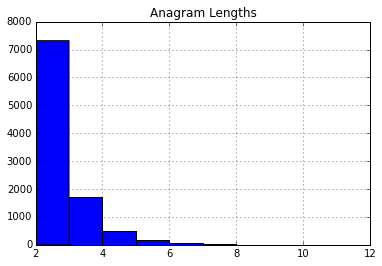

In [131]:
print("Question 3: Use matplotlib (or Excel) to visualize a histogram of the size of the anagrams.")
import matplotlib.pyplot as plt
%matplotlib inline
df_anagram_lengths = pd.DataFrame(anagram_lengths, columns=['Anagram Lengths'])

df_anagram_lengths.hist()
print(df_anagram_lengths.describe())

In [134]:
anagrams_no_punc = []
for i in range(0,len(anagrams)):
    anagrams_no_punc.append(str(anagrams[i]).translate(str.maketrans('','', "[]'' ")))
    
len(anagrams_no_punc)
#print(str(anagrams[0]).translate(str.maketrans('','', "[]'' ")))

9796

In [135]:
#Question 4
df=pd.DataFrame()
df = pd.DataFrame(anagram_keys, columns=['Anagram'])
df['Number_of_Anagrams'] = pd.DataFrame(anagram_lengths)
df['Anagram_Words'] = pd.DataFrame(anagrams_no_punc)
df.head()

,Anagram,Number_of_Anagrams,Anagram_Words
0,eelpr,2,"leper,repel"
1,eoorrst,3,"rooster,rooters,toreros"
2,eillrsw,2,"swiller,willers"
3,belu,2,"blue,lube"
4,bdeeors,2,"bedsore,sobered"


In [136]:
anagrams[0:10]

[['leper', 'repel'],
 ['rooster', 'rooters', 'toreros'],
 ['swiller', 'willers'],
 ['blue', 'lube'],
 ['bedsore', 'sobered'],
 ['birder', 'birred'],
 ['gorsiest', 'strigose'],
 ['filet', 'flite'],
 ['carter', 'crater', 'tracer'],
 ['stumpers', 'sumpters']]